## Train the network and find the accuracy. Tweak the Architecture - Increase number of layers, change activation functions, increase depth, & the like; and note the resultant change in accuracy. 5. Tabulate your observations. Apply at least 3 different regularization techniques (e.g. Weight decay, early stop, dropout etc. ), and note the change in the results in a tabular form.

In [1]:
import pandas as pd
data = pd.read_csv(r'dataset.csv')

In [2]:
data.head()

,Pregnancies,GlucosePlasma,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.30, random_state=42)

In [5]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [6]:
import keras
from keras import models, layers

In [7]:
model = models.Sequential()
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='softmax'))

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='acc')

In [9]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
17/17 [==============================] - 2s 4ms/step - loss: 3.6209 - acc: 0.3501
Epoch 2/5
17/17 [==============================] - 0s 4ms/step - loss: 3.3308 - acc: 0.3501
Epoch 3/5
17/17 [==============================] - 0s 4ms/step - loss: 3.1576 - acc: 0.3501
Epoch 4/5
17/17 [==============================] - 0s 5ms/step - loss: 3.0507 - acc: 0.3501
Epoch 5/5
17/17 [==============================] - 0s 4ms/step - loss: 2.9220 - acc: 0.3501


In [10]:
_,acc1 = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 2ms/step - loss: 2.8391 - acc: 0.3501


In [11]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(32,activation='sigmoid'))
model.add(layers.Dense(32,activation='sigmoid'))
model.add(layers.Dense(1,activation='relu'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='acc')

In [13]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
17/17 [==============================] - 2s 3ms/step - loss: 5.4002 - acc: 0.6499
Epoch 2/5
17/17 [==============================] - 0s 4ms/step - loss: 5.4002 - acc: 0.6499
Epoch 3/5
17/17 [==============================] - 0s 4ms/step - loss: 5.4002 - acc: 0.6499
Epoch 4/5
17/17 [==============================] - 0s 3ms/step - loss: 5.4002 - acc: 0.6499
Epoch 5/5
17/17 [==============================] - 0s 9ms/step - loss: 5.4002 - acc: 0.6499


In [14]:
_,acc2 = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 2ms/step - loss: 5.4002 - acc: 0.6499


In [15]:
# Dropout Layer
model = models.Sequential()
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='acc')

In [17]:
model.fit(x_train,y_train,epochs=15,batch_size=25)

Epoch 1/15
22/22 [==============================] - 2s 2ms/step - loss: 69.8242 - acc: 0.3501
Epoch 2/15
22/22 [==============================] - 0s 5ms/step - loss: 38.5936 - acc: 0.3557
Epoch 3/15
22/22 [==============================] - 0s 9ms/step - loss: 17.8249 - acc: 0.3724
Epoch 4/15
22/22 [==============================] - 0s 3ms/step - loss: 7.2062 - acc: 0.4637
Epoch 5/15
22/22 [==============================] - 0s 2ms/step - loss: 5.5536 - acc: 0.5791
Epoch 6/15
22/22 [==============================] - 0s 2ms/step - loss: 4.9998 - acc: 0.5512
Epoch 7/15
22/22 [==============================] - 0s 2ms/step - loss: 4.0750 - acc: 0.5661
Epoch 8/15
22/22 [==============================] - 0s 2ms/step - loss: 3.4277 - acc: 0.5493
Epoch 9/15
22/22 [==============================] - 0s 2ms/step - loss: 2.8884 - acc: 0.5642
Epoch 10/15
22/22 [==============================] - 0s 2ms/step - loss: 2.7288 - acc: 0.5549
Epoch 11/15
22/22 [==============================] - 0s 2ms/step -

In [18]:
_,acc3 = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 3ms/step - loss: 0.7452 - acc: 0.6294


In [19]:
# Early Stopping
from keras.callbacks import EarlyStopping
EarlyStopping?

In [20]:
callback = EarlyStopping(monitor='loss', patience=200, mode='min', verbose=1)

In [21]:
model = models.Sequential()
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='acc')

In [23]:
model.fit(x_train,y_train,epochs=15, callbacks=[callback], batch_size=25)

Epoch 1/15
22/22 [==============================] - 2s 5ms/step - loss: 6.7794 - acc: 0.4953
Epoch 2/15
22/22 [==============================] - 0s 7ms/step - loss: 3.1846 - acc: 0.4618
Epoch 3/15
22/22 [==============================] - 0s 5ms/step - loss: 1.3731 - acc: 0.4935
Epoch 4/15
22/22 [==============================] - 0s 7ms/step - loss: 1.1404 - acc: 0.5102
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 1.0079 - acc: 0.5251
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 0.9519 - acc: 0.5363
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.8760 - acc: 0.5270
Epoch 8/15
22/22 [==============================] - 0s 4ms/step - loss: 0.8656 - acc: 0.5698
Epoch 9/15
22/22 [==============================] - 0s 4ms/step - loss: 0.8349 - acc: 0.5475
Epoch 10/15
22/22 [==============================] - 0s 6ms/step - loss: 0.7875 - acc: 0.5754
Epoch 11/15
22/22 [==============================] - 0s 5ms/step - lo

In [24]:
_,acc4 = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 3ms/step - loss: 0.6732 - acc: 0.6108


In [25]:
# Weight Decay
from keras.regularizers import l2
l2?

In [26]:
model = models.Sequential()
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(24,activation='relu',kernel_regularizer='l2'))
model.add(layers.Dense(1,activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='acc')

In [28]:
model.fit(x_train,y_train,epochs=15, batch_size=25)

Epoch 1/15
22/22 [==============================] - 2s 3ms/step - loss: 4.0885 - acc: 0.4097
Epoch 2/15
22/22 [==============================] - 0s 3ms/step - loss: 1.4560 - acc: 0.6331
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 1.1656 - acc: 0.5438
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 1.0898 - acc: 0.5810
Epoch 5/15
22/22 [==============================] - 0s 2ms/step - loss: 1.0379 - acc: 0.5885
Epoch 6/15
22/22 [==============================] - 0s 3ms/step - loss: 0.9916 - acc: 0.6238
Epoch 7/15
22/22 [==============================] - 0s 3ms/step - loss: 0.9504 - acc: 0.6145
Epoch 8/15
22/22 [==============================] - 0s 3ms/step - loss: 0.9017 - acc: 0.6462
Epoch 9/15
22/22 [==============================] - 0s 3ms/step - loss: 0.8766 - acc: 0.6555
Epoch 10/15
22/22 [==============================] - 0s 3ms/step - loss: 0.8879 - acc: 0.6220
Epoch 11/15
22/22 [==============================] - 0s 3ms/step - lo

In [29]:
_,acc5 = model.evaluate(x_train,y_train)

17/17 [==============================] - 0s 3ms/step - loss: 0.7154 - acc: 0.6648


In [30]:
print("1st Accuracy - ",acc1*100,"%")
print("2nd Accuracy - ",acc2*100,"%")
print("3rd Accuracy - ",acc3*100,"%")
print("4th Accuracy - ",acc4*100,"%")
print("5th Accuracy - ",acc5*100,"%")

1st Accuracy -  35.00930964946747 %
2nd Accuracy -  64.9906873703003 %
3rd Accuracy -  62.942272424697876 %
4th Accuracy -  61.080074310302734 %
5th Accuracy -  66.4804458618164 %


In [31]:
labels = ['acc1', 'acc2', 'acc3', 'acc4', 'acc5']
values = [acc1, acc2, acc3, acc4, acc5]

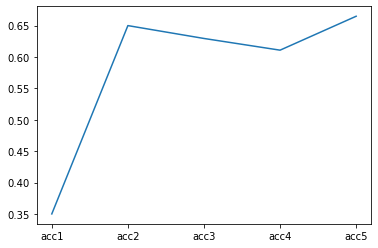

In [32]:
import matplotlib.pyplot as plt
plt.plot(labels, values)